<a href="https://colab.research.google.com/github/RajasekarMurugan/Explore/blob/main/Image_Reconstruction_using_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import requests
from PIL import Image
from diffusers import StableDiffusionImg2ImgPipeline # i/p and o/p are images.- thus img to img pipeline
import urllib.parse as parse
import os
from IPython.display import display
import matplotlib.pyplot as plt


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Pre-trained model from hugging face - Stable-diffiuision-v1.5

In [ ]:
model_id ="runwayml/stable-diffusion-v1-5"

pipeline=StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id,
    torch_dtype = torch.float16
)

device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = pipeline.to(device)



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [ ]:
# define check_url() - to verify if the given string is valid urL or not

def check_url(string):
  try:
    result = parse.urlparse(string)
    return all([result.scheme, result.netloc, result.path])
  except:
    return False



In [ ]:
# define load_image - to load the images either from url or local path

def load_image(image_path):
  if check_url(image_path):
    return Image.open(requests.get(image_path, stream = True).raw)
  elif os.path.exists(image_path):
    return Image.open(image_path)
  else:
    raise ValueError("Invalid Image Path or URL provoided")


In [ ]:
# load an external image using its URL

img_url = "https://images.unsplash.com/photo-1767358154446-86469a3dad8d?q=80&w=735&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
img = load_image(img_url)
img = img.resize((512, 512))

  0%|          | 0/40 [00:00<?, ?it/s]

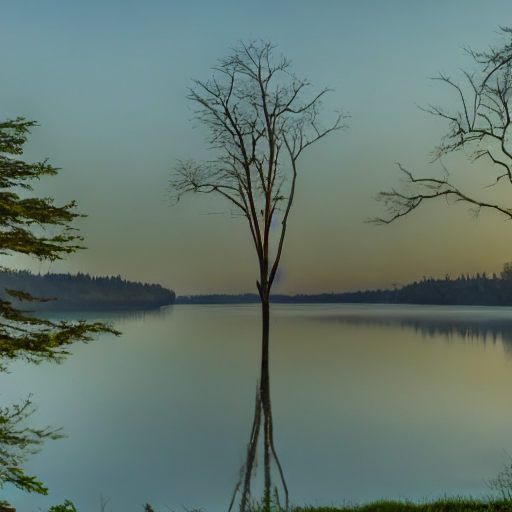

In [ ]:
# defining prompts and reconstructing/transforming the image

prompt = "A serene sunset over a calm lake with trees"
negative_prompt = "no people, no text, no builings"

transformed_image = pipeline(
    prompt = prompt,
    image = img,
    negative_prompt = negative_prompt,
    strenth = 0.1 # controls how much the original image is modified
).images[0]

transformed_image.save("transformed_image.png")
display(transformed_image)
